In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open('../../Udacity_Tennis_project/outputs/outcomes.pkl', 'rb') as handle:
            outputs = pickle.load(handle)

In [3]:
outputs.keys()

dict_keys(['agent_2_2', 'agent_2_1', 'agent_4_1', 'agent_4_2', 'agent_8_2', 'agent_8_1', 'agent_16_1', 'agent_16_2'])

In [5]:
outputs['agent_2_1'].keys()

dict_keys(['scores', 'time', 'actor_loss', 'critic_loss', 'score_play'])

In [32]:
outputs['agent_2_1']['score_play']

1.731666692532599

In [12]:
def plot_critic_loss(scores,
                nagents,
                activation_function,
                rolling_window=100):
    '''
    Plot critic loss and its moving average on the same chart.'''

    fig = plt.figure(figsize=(10, 5))
    plt.plot(np.arange(len(scores)), scores, '-y', label='episode score')
    plt.title(f'Criticc Loss and rolling mean. Number Agents {str(nagents)}, Activation Function {str(activation_function)}')
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(np.arange(len(scores)), rolling_mean, '-r', label='rolling_mean')
    plt.ylabel('loss')
    plt.xlabel('episode #')
    plt.legend()
    plt.tight_layout()

    plt.savefig(f'../../Udacity_Tennis_project/images/critic_loss_{nagents}_{activation_function}.jpg')
    return

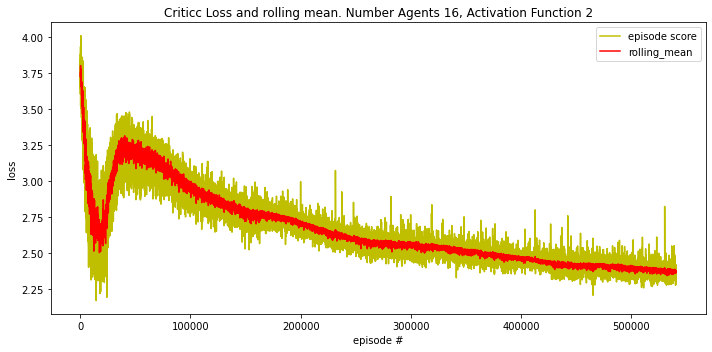

In [20]:
#['agent_2_2', 'agent_2_1', 'agent_4_1', 'agent_4_2', 'agent_8_2', 'agent_8_1', 'agent_16_1', 'agent_16_2']
plot_critic_loss(outputs['agent_16_2']['critic_loss'],
                16,
                2,
                rolling_window=100)

In [22]:
def plot_actor_loss(scores,
                nagents,
                activation_function,
                rolling_window=100):
    '''
    Plot actor loss and its moving average on the same chart.'''

    fig = plt.figure(figsize=(10, 5))
    plt.plot(np.arange(len(scores)), scores, '-y', label='episode score')
    plt.title(f'Actor Loss and rolling mean. Number Agents {str(nagents)}, Activation Function {str(activation_function)}')
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(np.arange(len(scores)), rolling_mean, '-r', label='rolling_mean')
    plt.ylabel('loss')
    plt.xlabel('episode #')
    plt.legend()
    plt.tight_layout()

    plt.savefig(f'../../Udacity_Tennis_project/images/actor_loss_{nagents}_{activation_function}.jpg')
    return

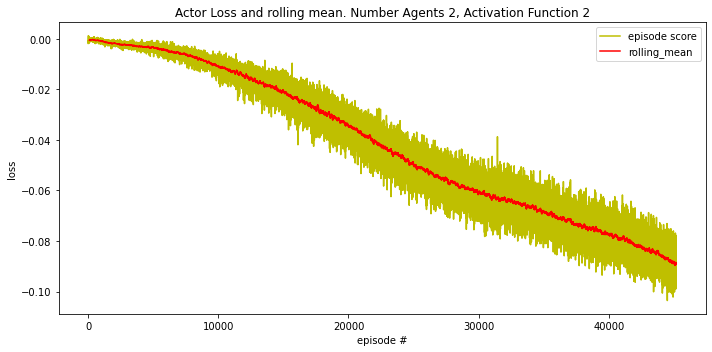

In [31]:
#['agent_2_2', 'agent_2_1', 'agent_4_1', 'agent_4_2', 'agent_8_2', 'agent_8_1', 'agent_16_1', 'agent_16_2']
plot_actor_loss(outputs['agent_2_2']['actor_loss'],
                2,
                2,
                rolling_window=100)

In [35]:
def plot_scores_training_all():
    """
    plot all scores 2000 episodes
    """
    with open('../../Udacity_Tennis_project/outputs/outcomes.pkl', 'rb') as handle:
        data = pickle.load(handle)
    labels = []
    text = f"D4PG Agent 2 workers LeakyRelu ({max(data['agent_2_1']['scores']).round(2)})"
    labels.append("D4PG Agent 2 workers LeakyRelu ")
    num_episodes = "1000"
    plt.figure(figsize=(16, 12))
    plt.subplot(111)
    plt.title(f'All Algorithm scores after solve environment score above +.8 average')
    plt.axhline(y=2.5, color='r', linestyle='dotted')
    plt.plot(np.arange(len(data['agent_2_1']['scores'])), data['agent_2_1']['scores'], label=text)
    
    text = f"D4PG Agent 2 workers Relu ({max(data['agent_2_2']['scores']).round(2)})"
    labels.append("D4PG Agent 2 workers Relu ")
    plt.plot(np.arange(len(data['agent_2_2']['scores'])), data['agent_2_2']['scores'], label=text)
    
    text = f"D4PG Agent 4 workers LeakyRelu ({max(data['agent_4_1']['scores']).round(2)})"
    labels.append("D4PG Agent 4 workers LeakyRelu")
    plt.plot(np.arange(len(data['agent_4_1']['scores'])), data['agent_4_1']['scores'], label=text)
    
    text = f"D4PG Agent 4 workers Relu ({max(data['agent_4_2']['scores']).round(2)})"
    labels.append("D4PG Agent 4 workers Relu")
    plt.plot(np.arange(len(data['agent_4_2']['scores'])), data['agent_4_2']['scores'], label=text)
    
    text = f"D4PG Agent 8 workers Relu ({max(data['agent_8_2']['scores']).round(2)})"
    labels.append("D4PG Agent 8 workers Relu")
    plt.plot(np.arange(len(data['agent_8_2']['scores'])), data['agent_8_2']['scores'], label=text)
    
    text = f"D4PG Agent 8 workers LeakyRelu ({max(data['agent_8_1']['scores']).round(2)})"
    labels.append("D4PG Agent 8 workers LeakyRelu")
    plt.plot(np.arange(len(data['agent_8_1']['scores'])), data['agent_8_1']['scores'], label=text)
    
    text = f"D4PG Agent 16 workers LeakyRelu ({max(data['agent_16_1']['scores']).round(2)})"
    labels.append("D4PG Agent 16 workers LeakyRelu")
    plt.plot(np.arange(len(data['agent_16_1']['scores'])), data['agent_16_1']['scores'], label=text)
    
    text = f"D4PG Agent 16 workers Relu ({max(data['agent_16_2']['scores']).round(2)})"
    labels.append("D4PG Agent 16 workers Relu")
    plt.plot(np.arange(len(data['agent_16_2']['scores'])), data['agent_16_2']['scores'], label=text)

    plt.ylabel('Score')
    plt.xlabel('Episodes #')
    title = "Algorithm and Max Score"
    plt.legend(title=title)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.savefig(f'../../Udacity_Tennis_project/images/scores_all_2.jpg')
    return labels

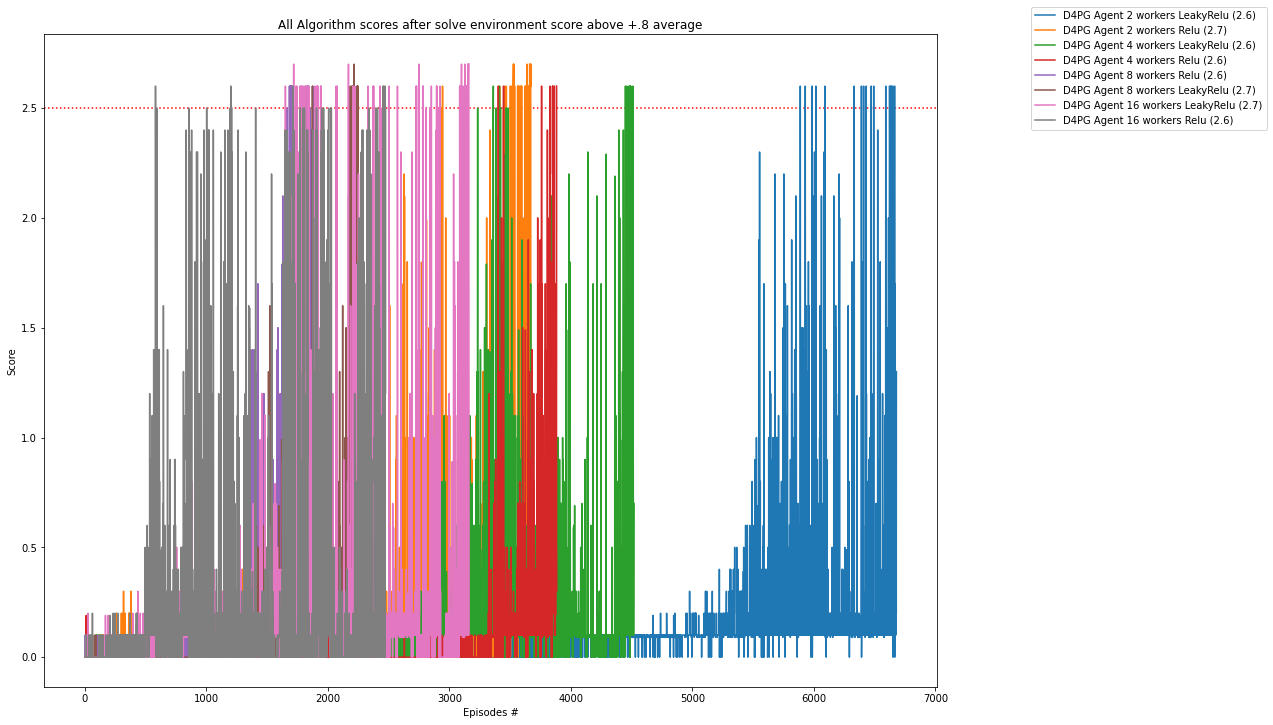

In [36]:
labels = plot_scores_training_all()

In [74]:
def plot_time_all(labels):

    """
    plot time to win env . Collect 13 yellow bananas
    """
    with open('../../Udacity_Tennis_project/outputs/outcomes.pkl', 'rb') as handle:
        data = pickle.load(handle)

    num_episodes = 2000
    plt.figure(figsize=(16, 12))
    plt.subplot(111)
    plt.title(f'All Algorithm time to solve the environment. mean during at least 100 episodes of +.8')

    scores = []
    types = []
    for key, i in zip(data.keys(), range(1, len(data.keys())+1)):
        scores.append(data[key]['time'])
        sc = data[key]['time']

        types.append(i)

        plt.bar(int(i), sc, label=labels[int(i) - 1] + " " +str(round(sc,0)))
    plt.ylabel('Time')
    plt.xlabel('Algorithm #')
    title = "Algorithm and Time to solve Env"
    plt.legend(title=title)
    plt.ylim([0, 11000])
    plt.tight_layout()
    plt.savefig(f'../../Udacity_Tennis_project/images/time_scores_all.jpg')

    return

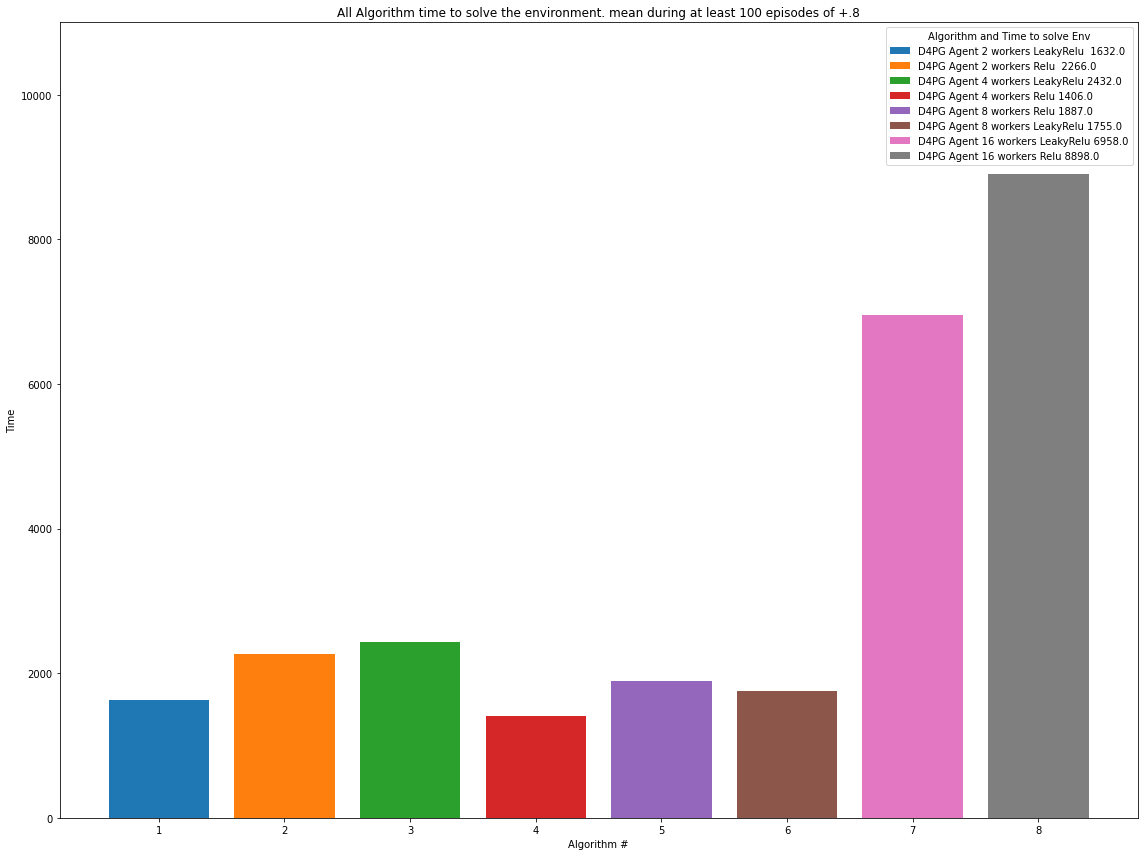

In [75]:
plot_time_all(labels)

In [50]:
def plot_number_episodes(labels):
    """

    """

    with open('../../Udacity_Tennis_project/outputs/outcomes.pkl', 'rb') as handle:
        data = pickle.load(handle)

    num_episodes = 2000
    plt.figure(figsize=(16, 12))
    plt.subplot(111)
    plt.title(f'All Algorithm number of episodes to solve the environment. (Mean during at least 100 episodes of +.8)')
    max_episodes=0
    scores = []
    types = []
    for key, i in zip(data.keys(), range(1, len(data.keys())+1)):
        scores.append(data[key]['time'])
        sc = len(data[key]['scores'])

        types.append(i)

        plt.bar(int(i), sc, label=labels[i - 1] + " " +str(round(sc,0)))
    plt.ylabel('Score')
    plt.xlabel('Algorithm #')
    title = "Algorithm and number episodes training"
    plt.legend(title=title)
    plt.ylim([0, max_episodes+10000])
    plt.tight_layout()

    plt.savefig(f'../../Udacity_Tennis_project/images/number_episodes_all.jpg')
    return

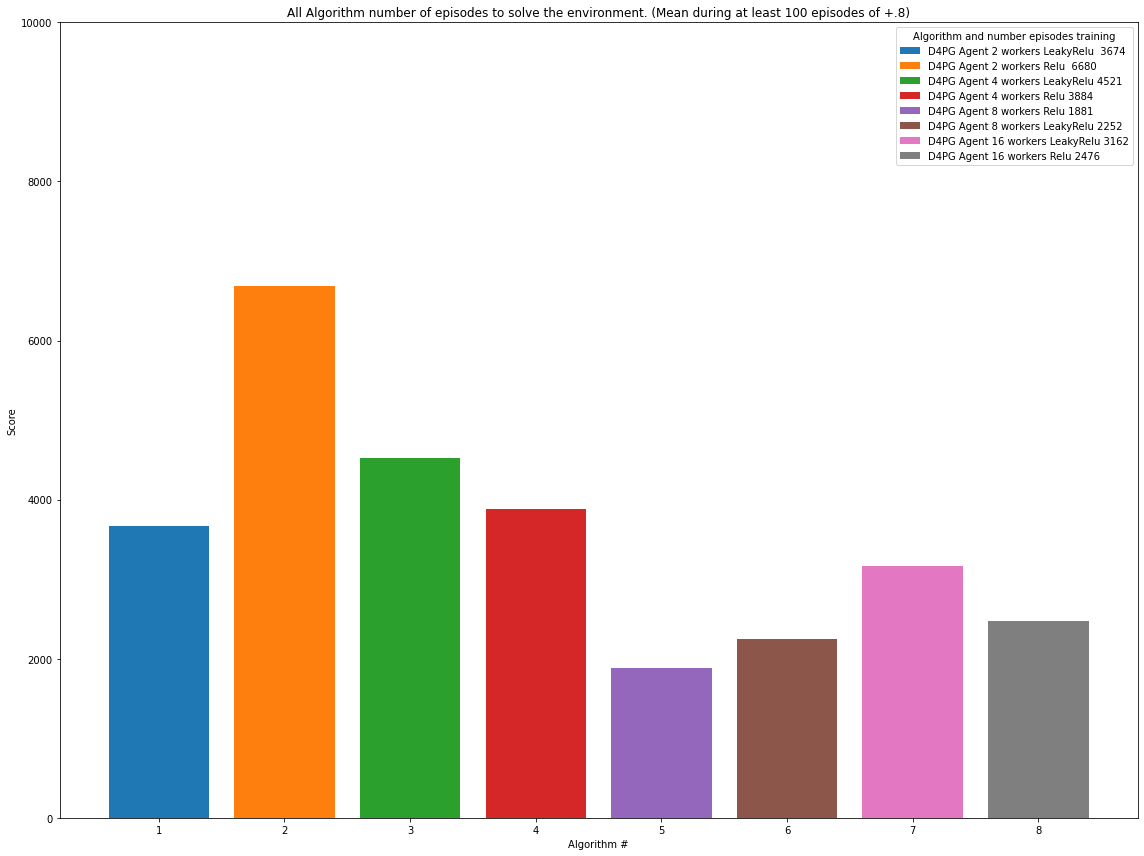

In [51]:
plot_number_episodes(labels)

In [48]:
def plot_play_scores(labels):
    """

    """

    with open('../../Udacity_Tennis_project/outputs/outcomes.pkl', 'rb') as handle:
        data = pickle.load(handle)

    num_episodes = 2000
    plt.figure(figsize=(16, 12))
    plt.subplot(111)
    plt.title(f'All Algorithm play scores average 3 Episodes.')
    max_episodes=0
    scores = []
    types = []
    for key, i in zip(data.keys(), range(1, len(data.keys())+1)):
        scores.append(data[key]['score_play'])
        sc =data[key]['score_play']

        types.append(i)

        plt.bar(int(i), sc, label=labels[i - 1] + " " +str(round(data[key]['score_play'],2)))
    plt.ylabel('Score')
    plt.xlabel('Algorithm #')
    title = "Algorithm and number episodes training"
    plt.legend(title=title)
    plt.ylim([0, 3])
    plt.tight_layout()

    plt.savefig(f'../../Udacity_Tennis_project/images/play_scores_all.jpg')
    return

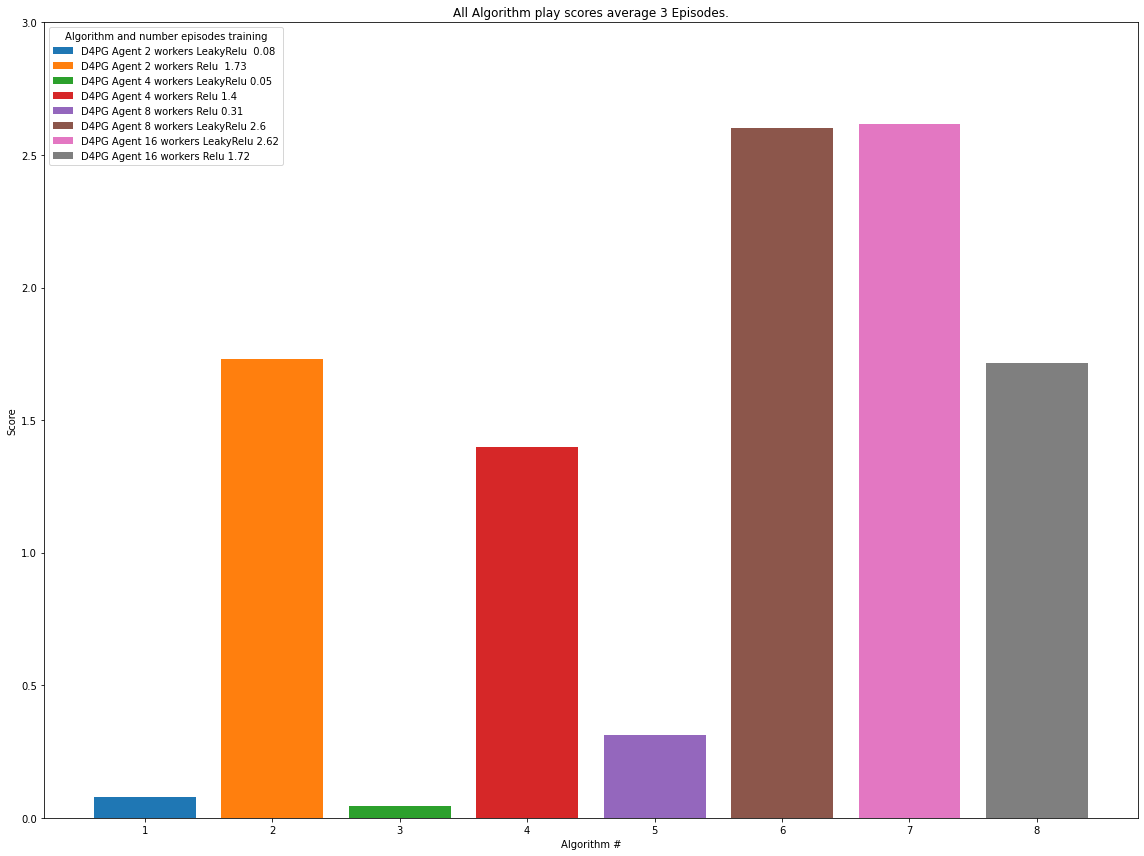

In [49]:
plot_play_scores(labels)